<img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="100"  style="float: left; margin-right: 10px;" /> 
       <div>
       <h1>Ejercicio de Regresión Lineal Simple</h1>
       <h4>Gasto Público y Tasa de Crecimiento<br>Armando Valdés López<br>Septiembre 2019</h4>
       </div>
     

In [24]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

### 01.- Preparación de Datos

In [25]:
Base_de_Datos= pd.read_excel('GPA_Y_CRECIMIENTO.xlsx')
Datos=pd.DataFrame(Base_de_Datos)

In [27]:
Datos.sort_values(by=['Estatus'],ascending=[False]).head(7)

,Pais,Estatus,Gasto_Publico,Tasa_Crecimiento
39,MEXICO_DA,MAL,22.976190,1.8125
40,MEXICO_IR,MAL,23.000000,1.9000
41,MEXICO_JO,MAL,22.976190,1.8125
42,MEXICO_PI,MAL,22.970000,1.9000
0,ARGENTINA_DA,BIEN,3.571429,2.0625
46,NICARAGUA_PI,BIEN,10.950000,4.1300
50,PANAMA_JO,BIEN,14.285714,5.3125


In [26]:
Datos_sin_Mexico = Datos.drop(Datos[Datos['Estatus']=='MAL'].index)
print("NUEVOS DATOS SIN MEXICO")
Datos_sin_Mexico.head(7)

NUEVOS DATOS SIN MEXICO


,Pais,Estatus,Gasto_Publico,Tasa_Crecimiento
0,ARGENTINA_DA,BIEN,3.571429,2.0625
1,ARGENTINA_IR,BIEN,3.800000,2.1000
2,ARGENTINA_JO,BIEN,3.571429,2.0625
3,ARGENTINA_PI,BIEN,3.690000,2.1600
4,BOLIVIA_DA,BIEN,5.357143,1.8125
5,BOLIVIA_IR,BIEN,5.800000,1.8000
6,BOLIVIA_JO,BIEN,5.357143,1.8125


In [28]:
print("Descripción de los Datos sin México")
print("Observaciones y Variables",Datos_sin_Mexico.shape)
summary2 = Datos_sin_Mexico.describe()
summary2 = summary2.transpose()
print(" ")
print("Resumen de Datos Cuantitativos")
print(summary2)

Descripción de los Datos sin México
Observaciones y Variables (65, 4)
 
Resumen de Datos Cuantitativos
                  count      mean       std      min       25%  50%  75%  \
Gasto_Publico      65.0  6.485031  4.012499  0.47000  3.690476  5.4  8.3   
Tasa_Crecimiento   65.0  2.744321  1.542742  0.47619  1.350000  2.5  3.6   

                        max  
Gasto_Publico     14.285714  
Tasa_Crecimiento   5.800000  


### 02.- Visualización de Datos

In [29]:
x_sin=np.array(Datos_sin_Mexico.Gasto_Publico).reshape((-1,1))
y_sin=np.array(Datos_sin_Mexico.Tasa_Crecimiento)

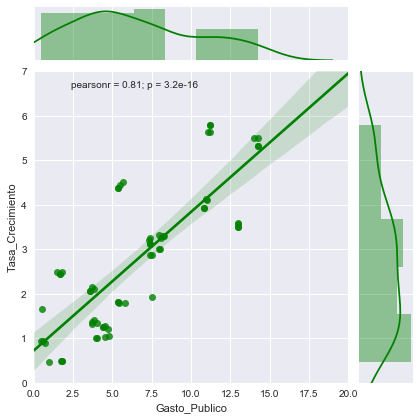

In [30]:
sns.set(style="darkgrid")
g = sns.jointplot("Gasto_Publico", "Tasa_Crecimiento", data=Datos_sin_Mexico,kind="reg",
                  xlim=(0,20) , ylim=(0, 7), color="g")

### 03.- Resultados de la Regresión 

In [34]:
model2=LinearRegression()
model2.fit(x_sin,y_sin)
R_sq2=model2.score(x_sin,y_sin)
y_pred=model2.predict(x_sin)
ecm=mean_squared_error(y_sin,y_pred)
rms2 = sqrt(mean_squared_error(y_sin,y_pred))
print("Intercepto a",model2.intercept_)
print("Pendiente b",model2.coef_)
print("Coeficiente de determinación",R_sq2)
print("Error cuadrático medio",ecm)
print("Raiz del error cuadrático medio", rms2)

Intercepto a 0.725516261512
Pendiente b [ 0.31130222]
Coeficiente de determinación 0.655552976036
Error cuadrático medio 0.807189667094
Raiz del error cuadrático medio 0.8984373473393845


In [ ]:
#Predecir datos
x_new=np.array([10,11,12]).reshape((-1,1))
y_new=model2.predict(x_new)
print(y_new)

************************************************************************************

<img src="https://www.sccpre.cat/mypng/full/403-4035365_tec-logo-png-logo-tec-de-monterrey.png"
        width="100"  style="float: left; margin-right: 10px;" /> 
       <div>
       <h1>Ejercicio Mínimos Cuadrados Ordinales</h1>
       <h4>Gasto Público y Tasa de Crecimiento<br>Armando Valdés López<br>Septiembre 2019</h4>
       </div>


## Fórmula de la Regresión 

<img src="imgreg/regresion1.png"
        width="150"  style="float: left; margin-right: 10px;" /> 

## Estimador

<img src="imgreg/regresion2.png"
        width="120"  style="float: left; margin-right: 10px;" /> 

**********************************************************************

## Obtención de "b" 1ra Forma


<img src="imgreg/regresion3.png"
        width="120"  style="float: left; margin-right: 10px;" /> 

In [ ]:
#Se obtiene el coeficiente de correlación
Pxy=np.corrcoef(Datos_sin_Mexico.Gasto_Publico, Datos_sin_Mexico.Tasa_Crecimiento) #correlacion
Pxy

In [ ]:
ds_x=np.std(Datos_sin_Mexico.Gasto_Publico, ddof=1) #muestral
ds_y=np.std(Datos_sin_Mexico.Tasa_Crecimiento, ddof=1)

print("Sx =", ds_x)
print("Sy =", ds_y)

In [ ]:
b1 = 0.80966226 * (1.5427418821430534 / 4.0124990502258555)
print("Pendiente b =",b1)

### Pendiente b = 0.311302224189259

**************************************************

## Obtención de "b" 2da Forma


<img src="imgreg/regresion5.png"
        width="120"  style="float: left; margin-right: 10px;" />

In [ ]:
#sacamos la covarianza de x y Y
Cov_xy=np.cov(Datos_sin_Mexico.Gasto_Publico, Datos_sin_Mexico.Tasa_Crecimiento)
Cov_xy

In [ ]:
Var_x=np.var(Datos_sin_Mexico.Gasto_Publico, ddof=1) #muestral
print("La varianza de X es = ",Var_x)

In [ ]:
print(5.01201208 / 16.100148628063394)

In [ ]:
pendiente_b =5.01201208/Var_x
print("Pendiente b = ", pendiente_b)

### Pendiente b =  0.31130222433250104

*************************************************************

## Obtención de "a"


<img src="imgreg/regresion4.png"
        width="180"  style="float: left; margin-right: 10px;" />

In [ ]:
media_y= np.mean(Datos_sin_Mexico.Tasa_Crecimiento)
media_x= np.mean(Datos_sin_Mexico.Gasto_Publico)
valor_b=  0.31130222433250104

In [ ]:
intercepto = media_y - (valor_b * media_x)
intercepto

### El intercepto es 0.7255162617645112